# TLR Callback

In [1]:
from tlr_callback import *
from keras.optimizers import *

/home/blmdr/.pyenv/versions/anaconda3-5.0.1/envs/a3ml/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/blmdr/.pyenv/versions/anaconda3-5.0.1/envs/a3ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Test Set

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Input

In [3]:
inp = Input(shape=(15,))                
x = Dense(10, activation='relu')(inp)
x = Dense(1, activation='sigmoid')(x)

model = Model(inp, x)

In [4]:
X = np.random.rand(2000000,15)

In [5]:
Y = np.random.randint(0,2,size=2000000)

## Callback test

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

The following tests callback functionality for each default Keras optimizer.

Tests demonstrate expected learning rate schedule behavior, as well as functionality of resetting and/or adjusting boundary values.

### SGD

In [7]:
epochs = 10
tlr = TrapezoidalLR(anneal_start_epoch=epochs - 2)
model.compile(optimizer=SGD(0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, Y, batch_size=2000, epochs=epochs, callbacks=[tlr], verbose=1)

Epoch 1/10
2000000/2000000 [==============================] - 8s 4us/step - loss: 0.7008 - acc: 0.5003
Epoch 2/10
2000000/2000000 [==============================] - 8s 4us/step - loss: 0.6987 - acc: 0.5002
Epoch 3/10
2000000/2000000 [==============================] - 8s 4us/step - loss: 0.6967 - acc: 0.5003
Epoch 4/10
2000000/2000000 [==============================] - 8s 4us/step - loss: 0.6956 - acc: 0.5000
Epoch 5/10
2000000/2000000 [==============================] - 8s 4us/step - loss: 0.6950 - acc: 0.5000
Epoch 6/10
2000000/2000000 [==============================] - 8s 4us/step - loss: 0.6947 - acc: 0.5002
Epoch 7/10
2000000/2000000 [==============================] - 8s 4us/step - loss: 0.6945 - acc: 0.5000
Epoch 8/10
2000000/2000000 [==============================] - 8s 4us/step - loss: 0.6943 - acc: 0.4999
Epoch 9/10
2000000/2000000 [==============================] - 8s 4us/step - loss: 0.6942 - acc: 0.5000
Epoch 10/10
2000000/2000000 [==============================] - 8s 4us/ste

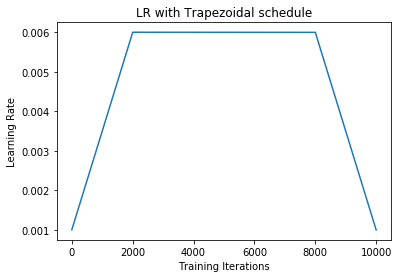

In [8]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("LR with Trapezoidal schedule")
plt.plot(tlr.history['iterations'], tlr.history['lr'])

In [9]:
# 2nd training
model.fit(X, Y, batch_size=2000, epochs=epochs, callbacks=[tlr], verbose=0)

In [10]:
tlr._reset(new_anneal_start_epoch=epochs - 2)

In [11]:
# 3rd training 
model.fit(X, Y, batch_size=2000, epochs=epochs, callbacks=[tlr], verbose=0)

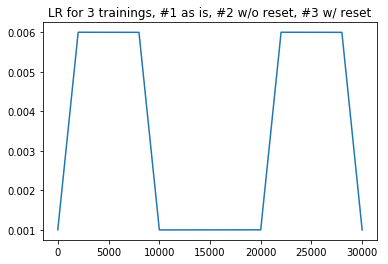

In [12]:
plt.title('LR for 3 trainings, #1 as is, #2 w/o reset, #3 w/ reset')
plt.plot(tlr.history['iterations'], tlr.history['lr'])

## Custom scaling function (`scale_mode` = `'zero2one'`)

In [16]:
epochs = 10
tlr_fn = lambda x: np.sin(x*np.pi/2.)
tlr = TrapezoidalLR(base_lr=0.001, max_lr=0.006,
                    step_size=2000, anneal_start_epoch=epochs - 2,
                    scale_fn=tlr_fn, scale_mode='zero2one')
model.fit(X, Y, batch_size=2000, epochs=epochs, callbacks=[tlr],verbose=0)

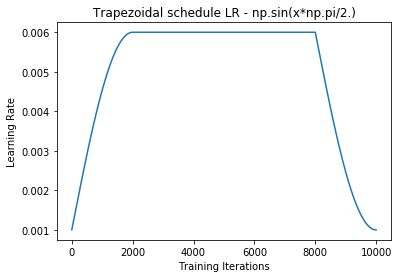

In [17]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("Trapezoidal schedule LR - np.sin(x*np.pi/2.)")
plt.plot(tlr.history['iterations'], tlr.history['lr'])

In [20]:
epochs = 10
tlr = lambda x: 0.5*x*(1+np.sin(x*np.pi/2.))
tlr = TrapezoidalLR(scale_fn=tlr, scale_mode='zero2one', anneal_start_epoch=epochs - 2)
model.compile(optimizer=SGD(), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X, Y, batch_size=2000, epochs=epochs, callbacks=[tlr], verbose=0)

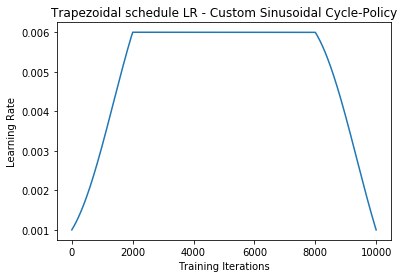

In [21]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("Trapezoidal schedule LR - Custom Sinusoidal Cycle-Policy")
plt.plot(tlr.history['iterations'], tlr.history['lr'])

## Custom scaling function (`scale_mode` = `'iterations'`)

In [22]:
epochs = 10
step_size = 2000
tlr_fn = lambda i: 0.5 if i < step_size/2 else 1.0
tlr = TrapezoidalLR(base_lr=0.001, max_lr=0.01,
                    step_size=step_size, anneal_start_epoch=epochs - 2,
                    scale_fn=tlr_fn, scale_mode='iterations')
model.fit(X, Y, batch_size=step_size, epochs=epochs, callbacks=[tlr],verbose=0)

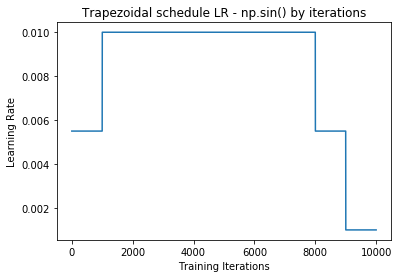

In [23]:
plt.xlabel('Training Iterations')
plt.ylabel('Learning Rate')
plt.title("Trapezoidal schedule LR - np.sin() by iterations")
plt.plot(tlr.history['iterations'], tlr.history['lr'])